<a href="https://colab.research.google.com/github/mounir2KH/web_scraping_BeautifulSoup/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge:**
Extraction des 50 articles les plus recents qui :
>
* Résultent de la recherche du mot clé "crise".
* font partie de la catégorie " Économie" 
>
depuis le site : le site lemonde.fr

Pour commencer nous allons travailler avec la bibliotheque **BeautifulSoup** pour le web-Scraping , et **Pandas** bien evidemment pour la création et la manipulation du dataframe .

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime

# **Processus d'extraction :**
>
Premierement on commence par extraire la premiere page resultantes de la recherche du mots clés : crise , une fois fait on se retrouve avec une liste d'articles pour chaque article on recupere son url , et on verifie dans la page de l'article si il fait vraiment partie de la categorie : Economie , si c'est le cas on extrait les données a savoir : titre, url, le temps de lecture et la date qui va nous servir pour repondre au question bonus .
>
On repete le processus avec tout les articles de la page puis on passe a la page suivante .

In [ ]:
CONST_NUMBER = 50   #nombre d'article a scraper
nb = 0              #compteur pour les article scraper deja 
i = 1               #compteur pour extraire les pages web l'une apres l'autre

#differents Listes qui vont contenir nos données , chacune representera une variable dans notre data frame : 
URLs = []
Titles = []
Reading_Times = []
Dates = []

#Construit la date d'aujoudhui qui va etre utile pour la construction de l'adresses des pages web 
now = datetime.datetime.now()
now_str = now.strftime('%d/%m/%Y')
while nb < CONST_NUMBER : 
   
  #l'adresses de nos differentes pages web : 
  sample_website='https://www.lemonde.fr/recherche/?search_keywords=crise&start_at=19/12/1944&end_at='+now_str+'&search_sort=date_desc&page='+str(i)
  #recuperer la page
  page=requests.get(sample_website)
  #instancier sous forme d'objet BeautifulSoup
  soup = BeautifulSoup(page.content, 'html.parser')
  
  #recuperer les liens des articles dans la page en cours
  links = soup.find_all("a",class_="teaser__link")
  link_url = []
  for link in links:
    link_url.append(link["href"])
  
  #on a recuperé tout les urls des article dans la page de recherche ! 

  for link in link_url:
    #on accede a la page de l'article
    page_article=requests.get(link)
    soup_article = BeautifulSoup(page_article.content, 'html.parser')
    
    #On extrait l'element parent ou se trouve la categorie : 
    Parent_categorie = soup_article.find_all("ul",class_="breadcrumb")
    if Parent_categorie :
      #On extrait la categorie 
      categorie = Parent_categorie[0].find("a")

      if categorie and categorie.text.strip() == "Économie":
        #Extraction des données restantes 
        Reading_time = soup_article.find_all(["span","p"],class_="meta__reading-time")
        if Reading_time : 

            Reading_time = Reading_time[0].text.strip()
            title = soup_article.find_all("h1",class_="article__title")[0].text.strip()
            date = soup_article.find_all("span",class_="meta__date")[0].text.strip()
            URLs.append(link)
            Reading_Times.append(Reading_time)
            Titles.append(title)
            Dates.append(date)
            
            nb = nb + 1

    if nb >= CONST_NUMBER : break;    
  i = i +1
 

**Quelques explications du code :**
>
* Comme vous avez pu le constater j'ai commencé par extraire l'element parent ou se trouvait la categorie puis la categorie elle meme , car j'ai remarqué que la balise qui comportait la categorie avait une classe qui varie selon les articles alors que l'element parent non , ce qui justifie l'extraction de l'element parent puis la categorie en elle meme 
>
* j'ai rajouté aussi des conditions sur categorie et Reading_time ou j'ai verifié si il etaient pas nuls car j'ai rencontré des articles qui n'ont pas de categorie ou de temps de lecture , c'etait vraiment rare un article pour chaque variable mais ils bloquaient le processus . 
>
(voir pieces-jointes)

>
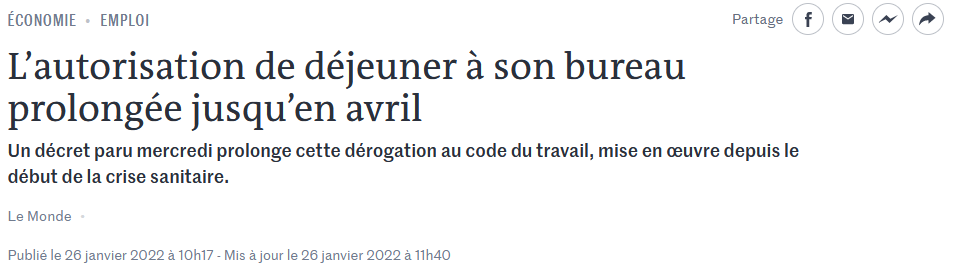


# **Creation du dataFrame:**
On crée notre dataframe à partir des liste deja contruites 

In [ ]:
df = pd.DataFrame(list(zip(Titles,URLs,Reading_Times,Dates)), columns =['title', 'URL','reading_time','Date'])

In [ ]:
df

,title,URL,reading_time,Date
0,"En France, un nombre de créations d’emplois in...",https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 5 min.,"Publié hier à 10h41, mis à jour à 03h36"
1,Sanofi dopé par le succès de son médicament ve...,https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 4 min.,"Publié hier à 10h10, mis à jour hier à 18h42"
2,"Pour continuer pendant l’épidémie de Covid-19,...",https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 7 min.,"Publié hier à 05h08, mis à jour hier à 17h27"
3,L’emploi privé renoue avec son niveau d’avant-...,https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 3 min.,"Publié hier à 09h07, mis à jour hier à 13h43"
4,La coopérative laitière Sodiaal prévoit deux n...,https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 3 min.,"Publié le 02 février 2022 à 09h38, mis à jour ..."
5,Le réaménagement de l’aéroport Nantes Atlantiq...,https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 3 min.,Publié le 01 février 2022 à 10h56
6,"Rodolphe Saadé, la révolution de l’héritier",https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 9 min.,Publié le 01 février 2022 à 11h16
7,Le chômage au plus bas en Europe grâce à une c...,https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 3 min.,Publié le 01 février 2022 à 14h47 - Mis à jour...
8,Des commerces toujours affectés par la crise s...,https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 2 min.,Publié le 02 février 2022 à 13h32 - Mis à jour...
9,Le changement climatique va secouer les marché...,https://www.lemonde.fr/economie/article/2022/0...,Temps de Lecture 3 min.,Publié le 02 février 2022 à 22h19 - Mis à jour...


Maintenant qu'on a extrait les donnés passons à leur traitement : 

Premierement interessons nous à la colonne **reading_time** ou on va extraire que la valeur en min du temps lu 


In [ ]:
#cette fonction permet d'extraire tout les chiffres d'une chaine de caractere et les retourne dans une liste 
#Comme on a un seulle chiffre on retourne que le premiere element de la liste 

def extract_int(x):
    return [int(s) for s in x.split() if s.isdigit()][0]

In [ ]:
#On applique ensuite cette fonction sur la colonnes reading_time : 
df['reading_time'] = df['reading_time'].apply(extract_int)

In [ ]:
df

,title,URL,reading_time,Date
0,"En France, un nombre de créations d’emplois in...",https://www.lemonde.fr/economie/article/2022/0...,5,"Publié hier à 10h41, mis à jour à 03h36"
1,Sanofi dopé par le succès de son médicament ve...,https://www.lemonde.fr/economie/article/2022/0...,4,"Publié hier à 10h10, mis à jour hier à 18h42"
2,"Pour continuer pendant l’épidémie de Covid-19,...",https://www.lemonde.fr/economie/article/2022/0...,7,"Publié hier à 05h08, mis à jour hier à 17h27"
3,L’emploi privé renoue avec son niveau d’avant-...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié hier à 09h07, mis à jour hier à 13h43"
4,La coopérative laitière Sodiaal prévoit deux n...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié le 02 février 2022 à 09h38, mis à jour ..."
5,Le réaménagement de l’aéroport Nantes Atlantiq...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 10h56
6,"Rodolphe Saadé, la révolution de l’héritier",https://www.lemonde.fr/economie/article/2022/0...,9,Publié le 01 février 2022 à 11h16
7,Le chômage au plus bas en Europe grâce à une c...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 14h47 - Mis à jour...
8,Des commerces toujours affectés par la crise s...,https://www.lemonde.fr/economie/article/2022/0...,2,Publié le 02 février 2022 à 13h32 - Mis à jour...
9,Le changement climatique va secouer les marché...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 02 février 2022 à 22h19 - Mis à jour...


In [ ]:
#On renomme la colonne tout en specifiant l'unité de mesure pour que sa soit plus lisible
df.rename(columns={'reading_time':'reading_time (min)'}, inplace=True)

In [ ]:
df

,title,URL,reading_time (min),Date
0,"En France, un nombre de créations d’emplois in...",https://www.lemonde.fr/economie/article/2022/0...,5,"Publié hier à 10h41, mis à jour à 03h36"
1,Sanofi dopé par le succès de son médicament ve...,https://www.lemonde.fr/economie/article/2022/0...,4,"Publié hier à 10h10, mis à jour hier à 18h42"
2,"Pour continuer pendant l’épidémie de Covid-19,...",https://www.lemonde.fr/economie/article/2022/0...,7,"Publié hier à 05h08, mis à jour hier à 17h27"
3,L’emploi privé renoue avec son niveau d’avant-...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié hier à 09h07, mis à jour hier à 13h43"
4,La coopérative laitière Sodiaal prévoit deux n...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié le 02 février 2022 à 09h38, mis à jour ..."
5,Le réaménagement de l’aéroport Nantes Atlantiq...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 10h56
6,"Rodolphe Saadé, la révolution de l’héritier",https://www.lemonde.fr/economie/article/2022/0...,9,Publié le 01 février 2022 à 11h16
7,Le chômage au plus bas en Europe grâce à une c...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 14h47 - Mis à jour...
8,Des commerces toujours affectés par la crise s...,https://www.lemonde.fr/economie/article/2022/0...,2,Publié le 02 février 2022 à 13h32 - Mis à jour...
9,Le changement climatique va secouer les marché...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 02 février 2022 à 22h19 - Mis à jour...


**Maintenant que tout est en place , passons aux questions bonus .** 



---



# Task 1 : 

Dans cette section il nous est demandé de calculer le temps de lecture médian, ainsi que le nombre d'articles par temps de lecture

# Le temps de lecture médian:
>
* On extrait la colonnes reading_time (min) , puis on ordonne selon l'ordre croissant .
* Soit N la taille de la colonne , selon la valeur de N si pair ou impair On extrait la mediane.

In [ ]:
def median(l):
    half = len(l) // 2
    l= sorted(l)
    if not len(l) % 2:
        return (l[half - 1] + l[half]) / 2.0
    return l[half]



In [ ]:
x = df['reading_time (min)']
print(sorted(x))
print('le temps de lecture median est de :',int(median(x)),'min')


[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8, 9, 20]
le temps de lecture median est de : 3 min


Recuperons Maintenant le nombre d'articles par temps de lecture:

In [ ]:
Output = df['reading_time (min)'].value_counts().rename_axis('reading_time (min)').reset_index(name='nombre_articles')
print (Output)

   reading_time (min)  nombre_articles
0                   3               13
1                   2               12
2                   4                8
3                   5                7
4                   6                3
5                   7                2
6                   1                2
7                   9                1
8                  20                1
9                   8                1


Si on somme le  nombre_articles pour verifier , on remarque qu'on a exactement 50 articles :

In [ ]:
Output['nombre_articles'].sum()

50



---



# Task 2 : 

Dans cette section il nous est demandé de Retrouver les titres d'article à partir des URL (via des expressions régulières, créer une colonne "title_2")

On peut visualiser la structure entiere de l'URL et remarquer que le titre se trouve toujour entre : **/titre_**





In [ ]:
for i in range(0,10): 
   print(df.iloc[i,1])

https://www.lemonde.fr/economie/article/2022/02/04/en-france-un-nombre-de-creations-d-emplois-inedit-depuis-l-annee-2000_6112314_3234.html
https://www.lemonde.fr/economie/article/2022/02/04/sanofi-dope-par-le-succes-de-son-medicament-vedette-le-dupixent_6112306_3234.html
https://www.lemonde.fr/economie/article/2022/02/04/face-a-la-vague-omicron-comment-une-pme-bretonne-s-adapte-et-mise-sur-la-solidarite-feminine_6112261_3234.html
https://www.lemonde.fr/economie/article/2022/02/04/l-economie-francaise-a-cree-648-200-emplois-en-2021_6112289_3234.html
https://www.lemonde.fr/economie/article/2022/02/02/la-cooperative-laitiere-sodiaal-prevoit-deux-nouvelles-fermetures-d-usines_6111963_3234.html
https://www.lemonde.fr/economie/article/2022/02/01/le-reamenagement-de-l-aeroport-nantes-atlantique-toujours-en-suspens_6111836_3234.html
https://www.lemonde.fr/economie/article/2022/02/01/rodolphe-saade-la-revolution-de-l-heritier_6111841_3234.html
https://www.lemonde.fr/economie/article/2022/02/01/

In [ ]:
import re
#On va utiliser cette expression reguliére pour la recuperation de tout les titres
regex = '.*/(.*?)_'   

In [ ]:
df['title_2'] = df['URL'].apply(lambda url : re.search(regex, str(url))[1])

In [ ]:
df

,title,URL,reading_time (min),Date,title_2
0,"En France, un nombre de créations d’emplois in...",https://www.lemonde.fr/economie/article/2022/0...,5,"Publié hier à 10h41, mis à jour à 03h36",en-france-un-nombre-de-creations-d-emplois-ine...
1,Sanofi dopé par le succès de son médicament ve...,https://www.lemonde.fr/economie/article/2022/0...,4,"Publié hier à 10h10, mis à jour hier à 18h42",sanofi-dope-par-le-succes-de-son-medicament-ve...
2,"Pour continuer pendant l’épidémie de Covid-19,...",https://www.lemonde.fr/economie/article/2022/0...,7,"Publié hier à 05h08, mis à jour hier à 17h27",face-a-la-vague-omicron-comment-une-pme-breton...
3,L’emploi privé renoue avec son niveau d’avant-...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié hier à 09h07, mis à jour hier à 13h43",l-economie-francaise-a-cree-648-200-emplois-en...
4,La coopérative laitière Sodiaal prévoit deux n...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié le 02 février 2022 à 09h38, mis à jour ...",la-cooperative-laitiere-sodiaal-prevoit-deux-n...
5,Le réaménagement de l’aéroport Nantes Atlantiq...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 10h56,le-reamenagement-de-l-aeroport-nantes-atlantiq...
6,"Rodolphe Saadé, la révolution de l’héritier",https://www.lemonde.fr/economie/article/2022/0...,9,Publié le 01 février 2022 à 11h16,rodolphe-saade-la-revolution-de-l-heritier
7,Le chômage au plus bas en Europe grâce à une c...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 14h47 - Mis à jour...,le-chomage-au-plus-bas-en-europe-grace-a-une-c...
8,Des commerces toujours affectés par la crise s...,https://www.lemonde.fr/economie/article/2022/0...,2,Publié le 02 février 2022 à 13h32 - Mis à jour...,des-commerces-toujours-affectes-par-la-crise-s...
9,Le changement climatique va secouer les marché...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 02 février 2022 à 22h19 - Mis à jour...,le-changement-climatique-va-secouer-les-marche...


In [ ]:
#On remplace les '-' part des ' ' pour que ca soit plus lisible
df['title_2']= df['title_2'].apply(lambda title : title.replace('-', ' '))
df

,title,URL,reading_time (min),Date,title_2
0,"En France, un nombre de créations d’emplois in...",https://www.lemonde.fr/economie/article/2022/0...,5,"Publié hier à 10h41, mis à jour à 03h36",en france un nombre de creations d emplois ine...
1,Sanofi dopé par le succès de son médicament ve...,https://www.lemonde.fr/economie/article/2022/0...,4,"Publié hier à 10h10, mis à jour hier à 18h42",sanofi dope par le succes de son medicament ve...
2,"Pour continuer pendant l’épidémie de Covid-19,...",https://www.lemonde.fr/economie/article/2022/0...,7,"Publié hier à 05h08, mis à jour hier à 17h27",face a la vague omicron comment une pme breton...
3,L’emploi privé renoue avec son niveau d’avant-...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié hier à 09h07, mis à jour hier à 13h43",l economie francaise a cree 648 200 emplois en...
4,La coopérative laitière Sodiaal prévoit deux n...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié le 02 février 2022 à 09h38, mis à jour ...",la cooperative laitiere sodiaal prevoit deux n...
5,Le réaménagement de l’aéroport Nantes Atlantiq...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 10h56,le reamenagement de l aeroport nantes atlantiq...
6,"Rodolphe Saadé, la révolution de l’héritier",https://www.lemonde.fr/economie/article/2022/0...,9,Publié le 01 février 2022 à 11h16,rodolphe saade la revolution de l heritier
7,Le chômage au plus bas en Europe grâce à une c...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 14h47 - Mis à jour...,le chomage au plus bas en europe grace a une c...
8,Des commerces toujours affectés par la crise s...,https://www.lemonde.fr/economie/article/2022/0...,2,Publié le 02 février 2022 à 13h32 - Mis à jour...,des commerces toujours affectes par la crise s...
9,Le changement climatique va secouer les marché...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 02 février 2022 à 22h19 - Mis à jour...,le changement climatique va secouer les marche...


Comme vous pouvez le remarquer il y a des lignes ou les colonnes title et title_2 sont les memes et d'autres ou non , cela est du à l'url comme il est definie sur le site .



---



# Task 3 : 

Dans cette section il nous est demandé d'ajouter une colonne avec la date de chaque article, au format pertinent

# **Etapes :**
>
* On commence d'abord par extraire la partie de la colonne date que ca soit publication ou Màj , depuis cettre partie on extrait exactement la date en chaine de caractere.
* Une fois la chaine extraite on procede à sa convertion en date , j'ai utilisé un dictionnaire de mois pour convertir le mois qui est en francais en format adequat(chiffre) afin de pouvoir utiliser la fonction strptime() , 

In [ ]:
MonthDict={ 'janvier' : "01",
       'février' : "02",
       'mars' : "03",
       'avril' : "04",
       'mai' : "05",
       'juin' : "06",
       'juillet' : "07",
       'août' : "08",
       'septembre' : "09",
       'octobre' : "10",
       'novembre' : "11",
       'decembre' : "12"
}

In [ ]:
import datetime

def extract_date(x):
  #car on s'interesse à la date de publication:
  x = x.split(',')[0]
  if 'aujourd’hui' in x : 
    return datetime.datetime.now().date()
  elif 'hier' in x : 
    return datetime.datetime.now().date()-datetime.timedelta(1)
  else:
    delim1 = 'le' 
    delim2 = 'à'
    pos1 = x.find(delim1) + len(delim1)+1
    pos2 = x.find(delim2) - len(delim2)
    #extraction sans le '/a'
    sousChaine = x[pos1:pos2]
    #remplacer le mois en francais par un mois en anglais 
    chaine_list = sousChaine.split(' ')
    chaine_list [1] = MonthDict[chaine_list [1]]
    sousChaine = ' '.join(chaine_list)
    #une fois qu'on a le format en anglais on transforme en date 
    return datetime.datetime.strptime(sousChaine, '%d %m %Y').date()
    

In [ ]:
df['Date_Publication'] = df['Date'].apply(lambda chaine : extract_date(chaine))

In [ ]:
df

,title,URL,reading_time (min),Date,title_2,Date_Publication
0,"En France, un nombre de créations d’emplois in...",https://www.lemonde.fr/economie/article/2022/0...,5,"Publié hier à 10h41, mis à jour à 03h36",en france un nombre de creations d emplois ine...,2022-02-04
1,Sanofi dopé par le succès de son médicament ve...,https://www.lemonde.fr/economie/article/2022/0...,4,"Publié hier à 10h10, mis à jour hier à 18h42",sanofi dope par le succes de son medicament ve...,2022-02-04
2,"Pour continuer pendant l’épidémie de Covid-19,...",https://www.lemonde.fr/economie/article/2022/0...,7,"Publié hier à 05h08, mis à jour hier à 17h27",face a la vague omicron comment une pme breton...,2022-02-04
3,L’emploi privé renoue avec son niveau d’avant-...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié hier à 09h07, mis à jour hier à 13h43",l economie francaise a cree 648 200 emplois en...,2022-02-04
4,La coopérative laitière Sodiaal prévoit deux n...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié le 02 février 2022 à 09h38, mis à jour ...",la cooperative laitiere sodiaal prevoit deux n...,2022-02-02
5,Le réaménagement de l’aéroport Nantes Atlantiq...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 10h56,le reamenagement de l aeroport nantes atlantiq...,2022-02-01
6,"Rodolphe Saadé, la révolution de l’héritier",https://www.lemonde.fr/economie/article/2022/0...,9,Publié le 01 février 2022 à 11h16,rodolphe saade la revolution de l heritier,2022-02-01
7,Le chômage au plus bas en Europe grâce à une c...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 14h47 - Mis à jour...,le chomage au plus bas en europe grace a une c...,2022-02-01
8,Des commerces toujours affectés par la crise s...,https://www.lemonde.fr/economie/article/2022/0...,2,Publié le 02 février 2022 à 13h32 - Mis à jour...,des commerces toujours affectes par la crise s...,2022-02-02
9,Le changement climatique va secouer les marché...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 02 février 2022 à 22h19 - Mis à jour...,le changement climatique va secouer les marche...,2022-02-02


In [ ]:
df["Date_Publication"] = df["Date_Publication"].astype("datetime64")

In [ ]:
df.dtypes

title                         object
URL                           object
reading_time (min)             int64
Date                          object
title_2                       object
Date_Publication      datetime64[ns]
dtype: object

Passons maintenant à l'extraction de la date de mise à jours

In [ ]:
from numpy.core.numeric import NaN
import datetime

def extract_date_Maj(x):
  if 'Mis à jour' in x or 'mis à jour' in x : 
    #car on s'interesse à la date de publication:
    if '-' in x : 
       x = x.split('-')[1]
    else:
       x = x.split(',')[1]
    if 'le' not in x : 
      return datetime.datetime.now().date()
    elif 'hier' in x : 
      return datetime.datetime.now().date()-datetime.timedelta(1)
    else:
      #print(x)
      delim1 = 'le' 
      delim2 = 'à'
      pos1 = x.find(delim1) + len(delim1)+1
      pos2 = x.find(delim2,x.find(delim2) + 1) - len(delim2)
      #extraction sans le '/a'
      sousChaine = x[pos1:pos2]

      #remplacer le mois en francais par un mois en anglais 
      chaine_list = sousChaine.split(' ')
      chaine_list [1] = MonthDict[chaine_list [1]]
      sousChaine = ' '.join(chaine_list)
      #une fois qu'on a le format en anglais on transforme en date 
      return datetime.datetime.strptime(sousChaine, '%d %m %Y').date()
  else: 
      return NaN



In [ ]:
df['Date_Màj'] = df['Date'].apply(lambda chaine : extract_date_Maj(chaine))

In [ ]:
df

,title,URL,reading_time (min),Date,title_2,Date_Publication,Date_Màj
0,"En France, un nombre de créations d’emplois in...",https://www.lemonde.fr/economie/article/2022/0...,5,"Publié hier à 10h41, mis à jour à 03h36",en france un nombre de creations d emplois ine...,2022-02-04,2022-02-05
1,Sanofi dopé par le succès de son médicament ve...,https://www.lemonde.fr/economie/article/2022/0...,4,"Publié hier à 10h10, mis à jour hier à 18h42",sanofi dope par le succes de son medicament ve...,2022-02-04,2022-02-05
2,"Pour continuer pendant l’épidémie de Covid-19,...",https://www.lemonde.fr/economie/article/2022/0...,7,"Publié hier à 05h08, mis à jour hier à 17h27",face a la vague omicron comment une pme breton...,2022-02-04,2022-02-05
3,L’emploi privé renoue avec son niveau d’avant-...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié hier à 09h07, mis à jour hier à 13h43",l economie francaise a cree 648 200 emplois en...,2022-02-04,2022-02-05
4,La coopérative laitière Sodiaal prévoit deux n...,https://www.lemonde.fr/economie/article/2022/0...,3,"Publié le 02 février 2022 à 09h38, mis à jour ...",la cooperative laitiere sodiaal prevoit deux n...,2022-02-02,2022-02-05
5,Le réaménagement de l’aéroport Nantes Atlantiq...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 10h56,le reamenagement de l aeroport nantes atlantiq...,2022-02-01,NaN
6,"Rodolphe Saadé, la révolution de l’héritier",https://www.lemonde.fr/economie/article/2022/0...,9,Publié le 01 février 2022 à 11h16,rodolphe saade la revolution de l heritier,2022-02-01,NaN
7,Le chômage au plus bas en Europe grâce à une c...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 01 février 2022 à 14h47 - Mis à jour...,le chomage au plus bas en europe grace a une c...,2022-02-01,2022-02-02
8,Des commerces toujours affectés par la crise s...,https://www.lemonde.fr/economie/article/2022/0...,2,Publié le 02 février 2022 à 13h32 - Mis à jour...,des commerces toujours affectes par la crise s...,2022-02-02,2022-02-03
9,Le changement climatique va secouer les marché...,https://www.lemonde.fr/economie/article/2022/0...,3,Publié le 02 février 2022 à 22h19 - Mis à jour...,le changement climatique va secouer les marche...,2022-02-02,2022-02-03


In [ ]:
df["Date_Màj"] = df["Date_Publication"].astype("datetime64")
df.dtypes

title                         object
URL                           object
reading_time (min)             int64
Date                          object
title_2                       object
Date_Publication      datetime64[ns]
Date_Màj              datetime64[ns]
dtype: object

Comme vous avez pu remarquer la demarche etait de commencer à partir de la colonne Date , et recuperer les deux date de Publication et de màj .

In [ ]:
#On exporte le dataframe en fichier csv .
df.to_csv('Articles_LeMonde.csv') 

### **Conclusion:**
On peut dire que le web-scraping demeure l'une des techniques les plus utilisées , en effet il permet l'acquisition de la donnée qui construit un element important au sein de l'entreprise .